In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/Myocardial infarction complications Database.csv")

In [3]:
#tomo el ID, la edad, el sexo, la cantidad de infartos que figura en la historia clínica,la presión sistólica
#contenido de sodium, AlAT, AsAT y CPK en el suero, conteo de celulas rojas y ESR(Erythrocyte sedimentation rate). 
datos = df[['ID', 'AGE', 'SEX', 'INF_ANAM', 'S_AD_ORIT', 'NA_BLOOD', 'ALT_BLOOD',
       'AST_BLOOD', 'L_BLOOD', 'ROE', 'FIBR_PREDS']] 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1700 non-null   int64  
 1   AGE         1692 non-null   float64
 2   SEX         1700 non-null   int64  
 3   INF_ANAM    1696 non-null   float64
 4   S_AD_ORIT   1433 non-null   float64
 5   NA_BLOOD    1325 non-null   float64
 6   ALT_BLOOD   1416 non-null   float64
 7   AST_BLOOD   1415 non-null   float64
 8   L_BLOOD     1575 non-null   float64
 9   ROE         1497 non-null   float64
 10  FIBR_PREDS  1700 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 146.2 KB


In [4]:
#armo un diccionario donde le pido que llene los nan con la mediana de cada columna
valores = {'ID': df['ID'].median(), 'AGE': df['AGE'].median(), 'SEX': df['SEX'].median(), 'INF_ANAM': df['INF_ANAM'].median(), 'S_AD_ORIT': df["S_AD_ORIT"].median(), 'NA_BLOOD': df['NA_BLOOD'].median(), 'ALT_BLOOD': df['ALT_BLOOD'].median(),
       'AST_BLOOD': df['AST_BLOOD'].median(), 'L_BLOOD': df['L_BLOOD'].median(), 'ROE': df['ROE'].median(), 'FIBR_PREDS': df['FIBR_PREDS'].median()}
datos = datos.fillna(valores)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1700 non-null   int64  
 1   AGE         1700 non-null   float64
 2   SEX         1700 non-null   int64  
 3   INF_ANAM    1700 non-null   float64
 4   S_AD_ORIT   1700 non-null   float64
 5   NA_BLOOD    1700 non-null   float64
 6   ALT_BLOOD   1700 non-null   float64
 7   AST_BLOOD   1700 non-null   float64
 8   L_BLOOD     1700 non-null   float64
 9   ROE         1700 non-null   float64
 10  FIBR_PREDS  1700 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 146.2 KB


In [5]:
datos["FIBR_PREDS"].value_counts() #cuanto hay de mi target?

0    1530
1     170
Name: FIBR_PREDS, dtype: int64

In [6]:
datos.corr()

,ID,AGE,SEX,INF_ANAM,S_AD_ORIT,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,FIBR_PREDS
ID,1.000000,0.213113,-0.116794,0.095289,-0.155869,-0.027627,-0.063048,0.002653,0.165842,0.066894,0.210371
AGE,0.213113,1.000000,-0.393314,0.098337,0.045591,0.025094,-0.100174,-0.052900,0.001554,0.197549,0.152842
SEX,-0.116794,-0.393314,1.000000,0.039988,-0.091942,-0.049753,0.053322,0.049337,0.017472,-0.199562,-0.103361
INF_ANAM,0.095289,0.098337,0.039988,1.000000,-0.074085,0.010145,-0.054258,-0.046122,-0.032784,0.063158,-0.026034
S_AD_ORIT,-0.155869,0.045591,-0.091942,-0.074085,1.000000,0.033133,-0.079810,-0.079591,-0.114370,0.041690,0.004252
NA_BLOOD,-0.027627,0.025094,-0.049753,0.010145,0.033133,1.000000,-0.009438,-0.022359,0.014114,-0.010102,0.007159
ALT_BLOOD,-0.063048,-0.100174,0.053322,-0.054258,-0.079810,-0.009438,1.000000,0.522017,0.044013,-0.009963,0.001678
AST_BLOOD,0.002653,-0.052900,0.049337,-0.046122,-0.079591,-0.022359,0.522017,1.000000,0.075467,-0.028594,0.013520
L_BLOOD,0.165842,0.001554,0.017472,-0.032784,-0.114370,0.014114,0.044013,0.075467,1.000000,0.008114,0.039880
ROE,0.066894,0.197549,-0.199562,0.063158,0.041690,-0.010102,-0.009963,-0.028594,0.008114,1.000000,0.040354


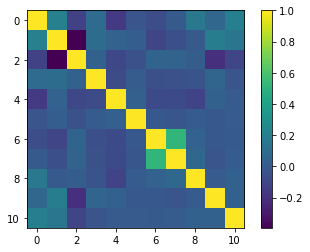

In [7]:
plt.imshow(datos.corr())
plt.colorbar()

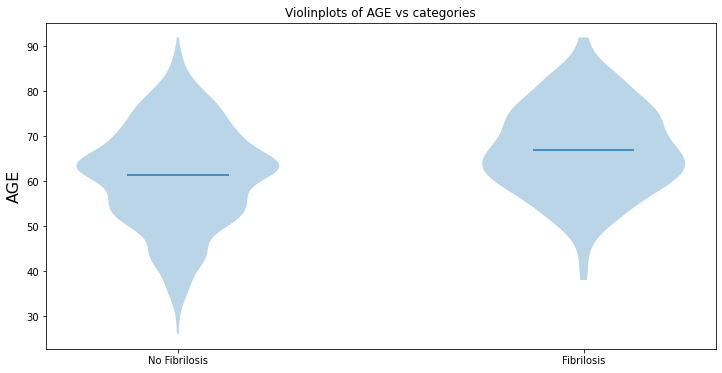

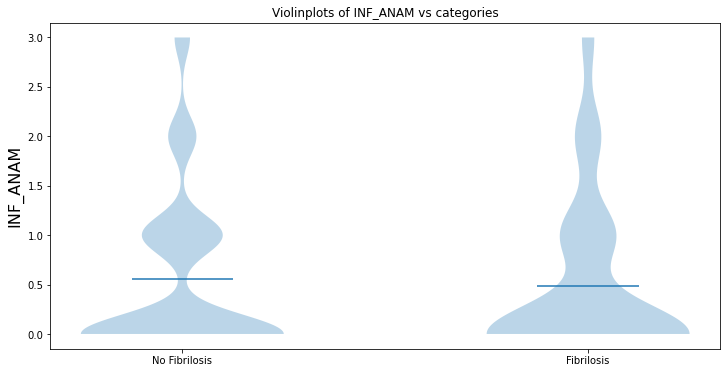

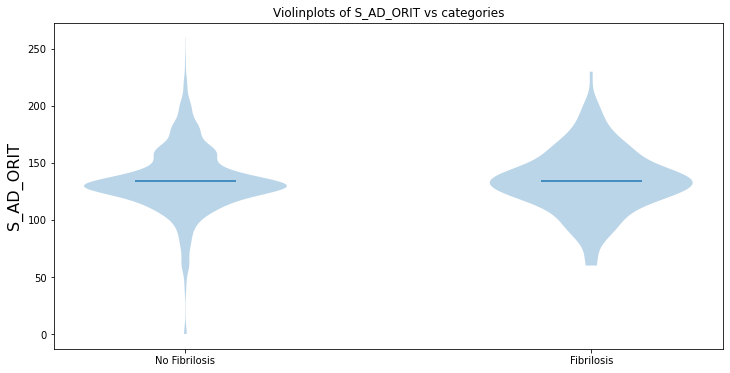

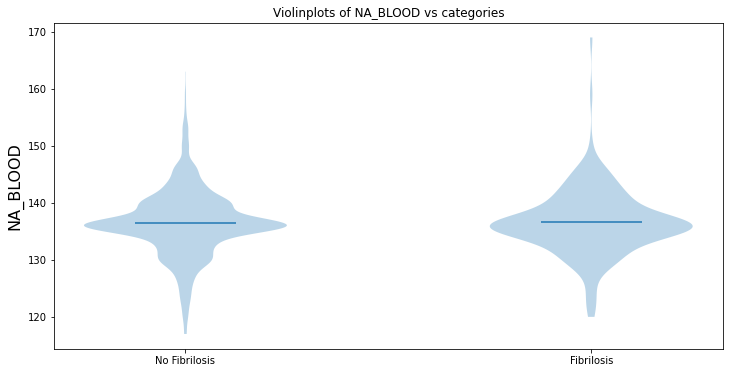

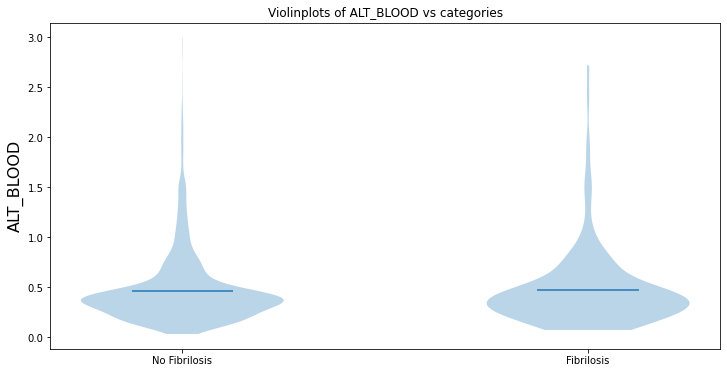

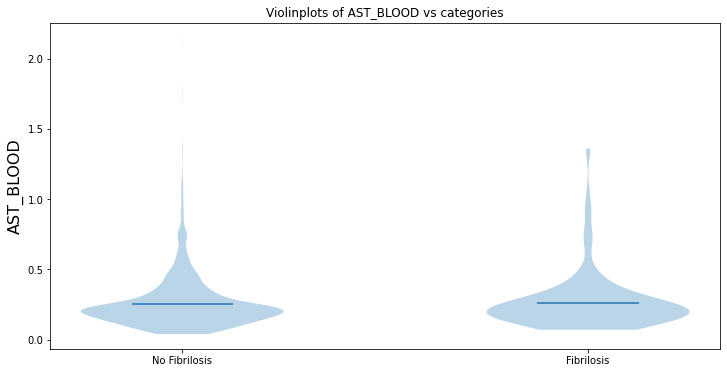

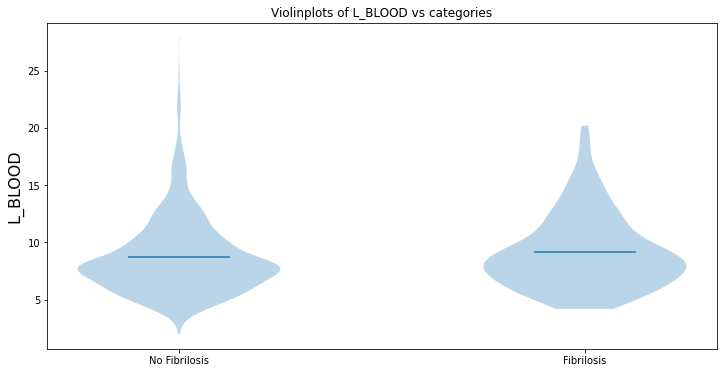

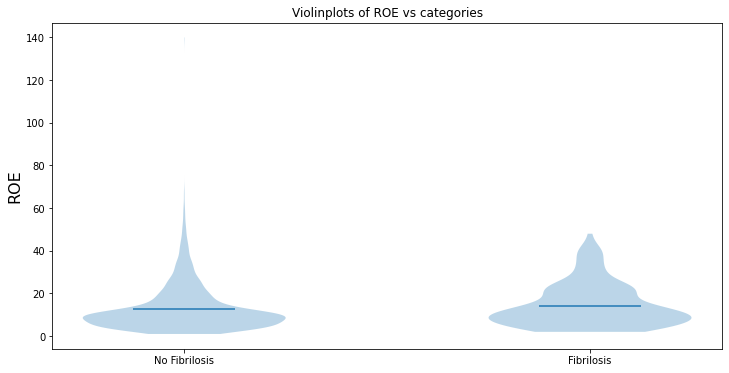

In [8]:
num_datos = datos[['AGE', 'INF_ANAM', 'S_AD_ORIT', 'NA_BLOOD', 'ALT_BLOOD',
       'AST_BLOOD', 'L_BLOOD', 'ROE', ]]
def violinplot(variable):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    categories = datos["FIBR_PREDS"].unique()  # 0 y 1

    data = [num_datos.loc[(datos["FIBR_PREDS"] == cat)][variable] for cat in categories]

    ax.violinplot(dataset=data, showextrema=False, showmeans=True, points=1000)
    ax.xaxis.set_ticks(range(1, len(categories) + 1))
    ax.xaxis.set_ticklabels(["No Fibrilosis", "Fibrilosis"])
    ax.set_ylabel(variable, fontsize=16)
    plt.title(f"Violinplots of {variable} vs categories")


for var in num_datos.columns:
    violinplot(var)

